## Build your own recommendation system for products on an e-commerce website like Amazon.com. 

* Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

* Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/).

* Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

### 1.Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amazon_cols = ['userId', 'productId', 'ratings', 'timestamp']
amazon_cols_required = ['userId', 'productId', 'ratings']
amazon = pd.read_csv("ratings_Electronics.csv", names=amazon_cols, usecols=amazon_cols_required)
amazon.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [4]:
amazon.ratings = amazon.ratings.astype('int32')

In [5]:
amazon.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


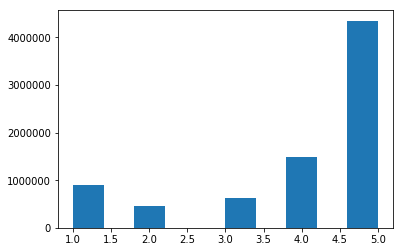

In [6]:
plt.hist(amazon['ratings'])
plt.show()

### 2.Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [7]:
higher_rate_df = amazon.loc[amazon['ratings'] > 4] 
higher_rate_df.reset_index(drop=True, inplace=True)

### 3.Split the data randomly into train and test dataset ( For example, split it in 70/30 ratio)

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(higher_rate_df, test_size = 0.30, random_state=0)

### 4.Build Popularity Recommender model.

In [9]:
def popular_recommendation(userId, num_recommendations=5):
    product_grouped_by_rating = higher_rate_df.groupby(['productId']).agg({'ratings': 'count'}).reset_index()
    sorted_product = product_grouped_by_rating.sort_values(['ratings'], ascending = False) # ratings in descending order
    df = sorted_product.reset_index(drop=True)
    recommendataions = df.head(num_recommendations)
    recommendataions.userId = userId
    return recommendataions.productId

In [10]:
print(popular_recommendation('A2CX7LUOHB2NDG'))

0    B0074BW614
1    B007WTAJTO
2    B0019EHU8G
3    B003ES5ZUU
4    B00DR0PDNE
Name: productId, dtype: object


In [11]:
print(popular_recommendation('A2WNBOD3WNDNKT'))

0    B0074BW614
1    B007WTAJTO
2    B0019EHU8G
3    B003ES5ZUU
4    B00DR0PDNE
Name: productId, dtype: object


In [12]:
# since it is popularity based recommendation system, it returns the same list of the popular products for all users

### 5.Build Collaborative Filtering model.

In [13]:
collaborative_filter = higher_rate_df.head(10000)

In [14]:
collaborative_filter.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5
1,A2CX7LUOHB2NDG,0321732944,5
2,A1QGNMC6O1VW39,0511189877,5
3,A2TY0BTJOTENPG,0511189877,5
4,A34ATBPOK6HCHY,0511189877,5


In [15]:
pivot_df= collaborative_filter.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,0132793040,0321732944,0511189877,0528881469,059400232X,0594012015,0594033896,0594033926,0594033934,0594287995,...,B00000K0ZX,B00000K102,B00000K10E,B00000K10G,B00000K12U,B00000K12X,B00000K135,B00000K137,B00000K139,B00000K13A
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0402564TCEO67AUZFJO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pivot_df.shape

(9731, 1406)

In [17]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_df, k = 50)
sigma = np.diag(sigma)

In [18]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
predictions_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
predictions_df.head()

productId,0132793040,0321732944,0511189877,0528881469,059400232X,0594012015,0594033896,0594033926,0594033934,0594287995,...,B00000K0ZX,B00000K102,B00000K10E,B00000K10G,B00000K12U,B00000K12X,B00000K135,B00000K137,B00000K139,B00000K13A
0,2.585856e-33,4.748990e-36,5.683327e-32,-1.140966e-31,8.383428e-33,9.496710e-33,-2.713106e-32,1.226273e-18,-1.054847e-32,-1.576722e-33,...,-7.455358e-33,1.964542e-33,-5.040748e-33,3.399772e-18,-2.530965e-32,1.105108e-32,8.046362e-17,-5.036311e-32,-2.752748e-19,-3.393370e-17
1,1.940635e-32,4.059670e-35,-4.888957e-32,6.881059e-33,5.831307e-33,-3.013492e-32,9.476792e-32,-8.504668e-19,3.408907e-32,-1.375614e-32,...,1.405109e-32,1.742629e-32,1.863838e-32,-5.436626e-19,7.411520e-32,-2.546176e-32,9.558697e-17,-3.832371e-32,3.804656e-19,1.286155e-16
2,3.741339e-17,7.520866e-20,-1.148472e-16,-4.850074e-18,5.036955e-18,-1.958087e-17,5.740402e-17,-2.176831e-08,2.495857e-17,-2.666252e-17,...,-6.147021e-17,3.300999e-17,-1.056985e-17,9.205567e-10,4.256543e-17,1.392761e-16,1.199834e-09,-2.386973e-17,1.219202e-05,-3.520010e-08
3,-1.277945e-16,-2.712445e-19,1.887148e-16,1.337173e-16,-3.102434e-17,8.698922e-17,-2.578638e-16,-3.299400e-05,-9.507487e-17,9.206684e-17,...,-7.609102e-17,-1.153500e-16,-8.394778e-17,1.025412e-10,-2.136983e-16,1.485925e-16,-3.521554e-09,1.791933e-16,-3.036110e-05,-8.552320e-05
4,1.054920e-32,2.207583e-35,-2.706233e-32,4.591988e-33,3.265004e-33,-1.739516e-32,5.457722e-32,-4.948493e-19,1.962890e-32,-7.466373e-33,...,8.115525e-33,9.481481e-33,9.636184e-33,-2.195222e-19,4.260601e-32,-1.477187e-32,5.504471e-17,-2.151645e-32,2.309971e-19,7.517575e-17


In [48]:
def recommend_item(userID, pivot_df, predictions_df, num_recommendations=5):
    user_idx = userID-1
    sort_prod_by_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    sort_prod_by_predictions = predictions_df.iloc[user_idx].sort_values(ascending=False)
    
    ratings_df = pd.concat([sort_prod_by_ratings, sort_prod_by_predictions], axis=1)
    ratings_df.index.name = 'Recommended Items'
    ratings_df.columns = ['prod_by_ratings', 'prod_by_predictions']
    ratings_df = ratings_df.loc[ratings_df.prod_by_ratings == 0]   
    ratings_df = ratings_df.sort_values('prod_by_predictions', ascending=False)
    print('\nBelow are the recommended items:\n')
    print(ratings_df.head(num_recommendations))

In [49]:
recommend_item(121, pivot_df, predictions_df)


Below are the recommended items:

                   prod_by_ratings  prod_by_predictions
Recommended Items                                      
9575871979                     0.0         9.550089e-17
9888002198                     0.0         8.438619e-17
B00000K135                     0.0         4.942736e-17
7214047977                     0.0         3.726323e-17
B00000J1UQ                     0.0         3.543282e-17


D:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### 6.Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [51]:
rmse_df = pd.concat([pivot_df.mean(), predictions_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
rmse = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
rmse

0.00318

### 7.Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [50]:
recommend_item(200, pivot_df, predictions_df)


Below are the recommended items:

                   prod_by_ratings  prod_by_predictions
Recommended Items                                      
B00000JD34                     0.0             0.020968
B00000JCT8                     0.0             0.001806
9989485623                     0.0             0.000598
B00000JCTO                     0.0             0.000163
B00000J3WQ                     0.0             0.000061


D:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### 8.Summarise your insights.

In [ ]:
#The collaborative filtering algorithm uses User Behavior for recommending items. 
#This algorithm first finds the similarity score between users. Based on this similarity score, 
#it then picks out the most similar users and recommends products which these similar users have liked or bought previously.
# Users having higher correlation will tend to be similar.